<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Predictions: Regression for Car Mileage and Diamond Price


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/CarsnDiamonds.png" width="50%">


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to use a car data set to train a regression model that will predict the mileage of a car.</p>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Task-3---Build-and-Train-a-Linear-Regression-Model">Task 3 - Build and Train a Linear Regression Model</a></li>
    <li><a href="#Task-4---Evaluate-the-model-and-make-predictions">Task 4 - Evaluate the model and make predictions</a></li>        </ol>
    </li>
    


<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(diamond-dataset)">Exercise 1 - Loading a dataset (diamond dataset)</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Build-and-Train-a-new-Linear-Regression-Model">Exercise 3 - Build and Train a new Linear Regression Model</a></li>
    <li><a href="#Exercise-4---Evaluate-the-model">Exercise 4 - Evaluate the model</a></li>
    <li><a href="#Exercise-5---Predict-the-price-of-a-diamond">Exercise 5 - Predict the price of a diamond</a></li>
    </ol>
</ol>




## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Identify the target and features.
 - Use Linear Regression to build a model to predict car mileage.
 - Use metrics to evaluate the model.
 - Make predictions using a trained model.


## Datasets

In this lab you will be using dataset(s):

 - Modified version of car mileage dataset. Available at https://archive.ics.uci.edu/ml/datasets/auto+mpg 
 - Modified version of diamonds dataset. Available at https://www.openml.org/search?type=data&sort=runs&id=42225&status=active
 


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [2]:
# install required libraries
!pip install pandas==1.3.5
!pip install scikit-learn==1.0.2 
!pip install numpy==1.21.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 94.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4


In [3]:
# suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

### Importing Required Libraries


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

## Task 1 - Load the data in a csv file into a dataframe


In [6]:
# import df from url
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv")
df.head(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
0,15.0,8,390.0,190,3850,8.5,70,American
1,21.0,6,199.0,90,2648,15.0,70,American
2,18.0,6,199.0,97,2774,15.5,70,American
3,16.0,8,304.0,150,3433,12.0,70,American
4,14.0,8,455.0,225,3086,10.0,70,American


Let's find out the number of rows and columns in the dataset:


In [7]:
df.shape

(392, 8)

Let's create a scatter plot of Horsepower versus mileage(MPG) . This will help us visualize the relationship between them.


<AxesSubplot:xlabel='Horsepower', ylabel='MPG'>

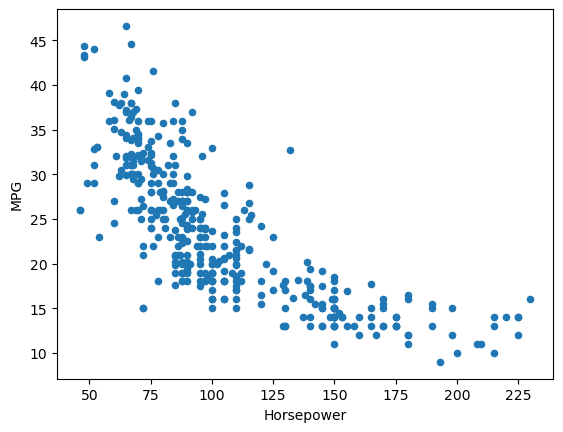

In [8]:
# HP-MPG
df.plot.scatter(x="Horsepower", y="MPG")

<AxesSubplot:xlabel='Cylinders', ylabel='Engine Disp'>

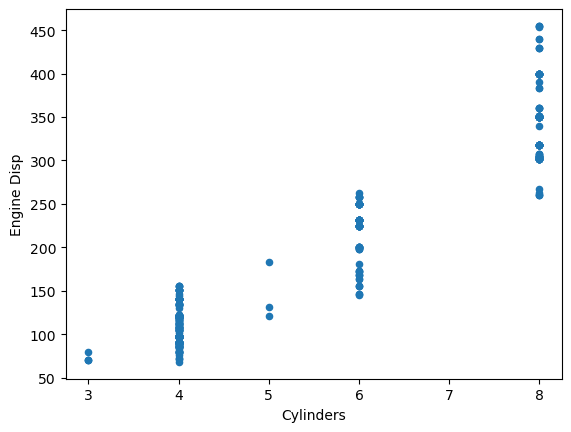

In [9]:
# Cylinders-Engine Disp
df.plot.scatter(x="Cylinders", y="Engine Disp")

<AxesSubplot:xlabel='Year', ylabel='Weight'>

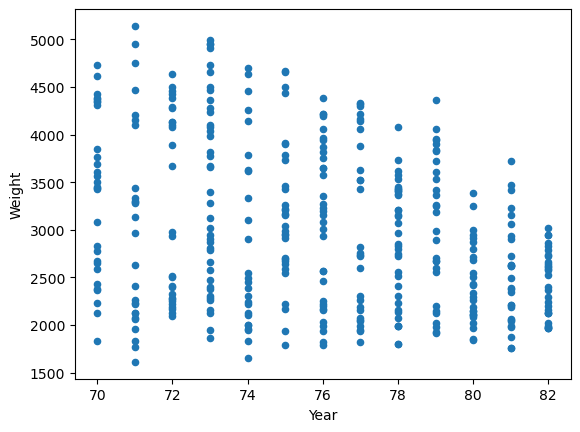

In [14]:
# Year-Weight
df.plot.scatter(x="Year", y="Weight")

You are encouraged to create more plots to visualize relationships amongst other columns


## Task 2 - Identify the target column and the data columns


In [27]:
# Identify the target, which is the value that a model needs to predict
target = df["MPG"]
target.head(5)

0    15.0
1    21.0
2    18.0
3    16.0
4    14.0
Name: MPG, dtype: float64

In [28]:
# Idnetify features, which are the values a model learns from
features1 = df[["Horsepower", "Weight"]]
features1.head(5)

,Horsepower,Weight
0,190,3850
1,90,2648
2,97,2774
3,150,3433
4,225,3086


In [29]:
# Create multiple features in the same way
features2 = df[["Horsepower", "Weight", "Cylinders"]]
features2.head(5)

,Horsepower,Weight,Cylinders
0,190,3850,8
1,90,2648,6
2,97,2774,6
3,150,3433,8
4,225,3086,8


## Task 3 - Build and Train a Linear Regression Model


In [30]:
# Create a Linear Regression model
lr1 = LinearRegression()
lr2 = LinearRegression()

# Train and fit the model 
lr1.fit(features1, target)
lr2.fit(features2, target)

LinearRegression()

## Task 4 - Evaluate the model and make predictions


Your model is now trained. Time to evaluate the model.


In [32]:
# Higher the score, better the model
lr1.score(features1, target)

0.7063752737298348

In [33]:
lr2.score(features2, target)

0.7076518943128076

In [36]:
# Make predictions for a car with HP = 100, Weight = 2000
lr1.predict([[100, 2000]])

array([29.3216098])

In [ ]:
# 29.3216098 miles per gallon is the mileage of a car with HorsePower = 100 and Weight = 2000

# Exercises


In [38]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

### Exercise 1 - Loading a dataset (diamond dataset)


In [41]:
df2 = pd.read_csv(URL2)
df2.head(5)

,s,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Exercise 2 - Identify the target column and the data columns


 - use the price column as target
 - use the columns carat and depth as features


In [44]:
target3 = df2["price"]
features3 = df2[["carat", "depth"]]

### Exercise 3 - Build and Train a new Linear Regression Model


Create a new Linear Regression Model


In [45]:
lr3 = LinearRegression()
lr3.fit(features3, target3)

LinearRegression()

### Exercise 4 - Evaluate the model


Print the score of the model


In [46]:
lr3.score(features3, target3)

0.8506754571636563

### Exercise 5 - Predict the price of a diamond


Predict the price of a diamond with carat = 0.3 and depth = 60


In [48]:
lr3.predict([[0.3, 60]])
# 245 price

array([244.95605225])

Congratulations! You have completed this lab.<br>
You are encouraged to experiment creating models with more than 2 feature columns


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/)


## Contributors
[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-04-14|0.1|Ramesh Sannareddy|Initial Version Created|
|2023-06-20|0.3|Vicky Kuo|Proofreading|


Copyright © 2023 IBM Corporation. All rights reserved.
